In [157]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [158]:
ds1 = xr.open_dataset('data/low_sulfate_reduction_rate/2_po75-25_di1e-9/water.nc')
alkflux_df = ds1['B_S_SO4   _flux'].to_dataframe()
alkflux_df = alkflux_df.reset_index()
alkflux_df.z_faces.values[1]

2.450000047683716

In [159]:
ds1 = xr.open_dataset('data/low_sulfate_reduction_rate/2_po75-25_di1e-9/water.nc')
ds2 = xr.open_dataset('data/low_sulfate_reduction_rate/3_po75-25_di2e-9/water.nc')
ds3 = xr.open_dataset('data/low_sulfate_reduction_rate/4_po75-25_di5e-9/water.nc')
ds4 = xr.open_dataset('data/low_sulfate_reduction_rate/5_po75-25_di10e-9/water.nc')

#### Alkalinity quotas

In [160]:
alkflux_bottom_july = []
nh4flux_bottom_july = []
no2flux_bottom_july = []
no3flux_bottom_july = []
po4flux_bottom_july = []
so4flux_bottom_july = []

alk_mean = []
nh4_mean = []
no2_mean = []
no3_mean = []
po4_mean = []
so4_mean = []

In [161]:
i = 0
for ds in (ds1, ds2, ds3, ds4):
    alkflux_df = ds['B_C_Alk   _flux'].to_dataframe()
    nh4flux_df = ds['B_NUT_NH4 _flux'].to_dataframe()
    no2flux_df = ds['B_NUT_NO2 _flux'].to_dataframe()
    no3flux_df = ds['B_NUT_NO3 _flux'].to_dataframe()
    po4flux_df = ds['B_NUT_PO4 _flux'].to_dataframe()
    so4flux_df = ds['B_S_SO4   _flux'].to_dataframe()
    
    alkflux_bottom = alkflux_df.groupby('z_faces').get_group(2.5)
    nh4flux_bottom = nh4flux_df.groupby('z_faces').get_group(2.5)
    no2flux_bottom = no2flux_df.groupby('z_faces').get_group(2.5)
    no3flux_bottom = no3flux_df.groupby('z_faces').get_group(2.5)
    po4flux_bottom = po4flux_df.groupby('z_faces').get_group(2.5)
    so4flux_bottom = so4flux_df.groupby('z_faces').get_group(2.5)
    
    alkflux_bottom_july.append(alkflux_bottom.loc['2011-07-01':'2011-08-01'])
    nh4flux_bottom_july.append(nh4flux_bottom.loc['2011-07-01':'2011-08-01'])
    no2flux_bottom_july.append(no2flux_bottom.loc['2011-07-01':'2011-08-01'])
    no3flux_bottom_july.append(no3flux_bottom.loc['2011-07-01':'2011-08-01'])
    po4flux_bottom_july.append(po4flux_bottom.loc['2011-07-01':'2011-08-01'])
    so4flux_bottom_july.append(so4flux_bottom.loc['2011-07-01':'2011-08-01'])
    
    alkflux_bottom_july[i] = alkflux_bottom_july[i].reset_index()
    nh4flux_bottom_july[i] = nh4flux_bottom_july[i].reset_index()
    no2flux_bottom_july[i] = no2flux_bottom_july[i].reset_index()
    no3flux_bottom_july[i] = no3flux_bottom_july[i].reset_index()
    po4flux_bottom_july[i] = po4flux_bottom_july[i].reset_index()
    so4flux_bottom_july[i] = so4flux_bottom_july[i].reset_index()
    
    alk_mean.append(alkflux_bottom_july[i]['B_C_Alk   _flux'].mean())
    nh4_mean.append(nh4flux_bottom_july[i]['B_NUT_NH4 _flux'].mean())
    no2_mean.append(no2flux_bottom_july[i]['B_NUT_NO2 _flux'].mean())
    no3_mean.append(no3flux_bottom_july[i]['B_NUT_NO3 _flux'].mean())
    po4_mean.append(po4flux_bottom_july[i]['B_NUT_PO4 _flux'].mean())
    so4_mean.append(so4flux_bottom_july[i]['B_S_SO4   _flux'].mean())
    
    i += 1

In [162]:
alk = np.array(alk_mean)
nh4 = np.array(nh4_mean)
no2 = np.array(no2_mean)
no3 = np.array(no3_mean)
po4 = np.array(po4_mean)
so4 = np.array(so4_mean)

In [163]:
alk

array([ 3.92297626,  6.50924492, 11.49930954, 17.17532921])

In [169]:
alk_calc = nh4-no2-no3-po4-2*so4
alk_calc

array([ 4.65621738,  7.24341502, 12.23533618, 17.91454743])

In [170]:
total = np.absolute(nh4)+np.absolute(no2)+np.absolute(no3)+np.absolute(po4)+2*np.absolute(so4)
total

array([ 4.69256479,  7.30797953, 12.36895051, 18.13660784])

In [166]:
quota_nh4 = np.absolute(nh4)/total
quota_nh4

array([0.0616625 , 0.07086324, 0.08627272, 0.09584143])

In [167]:
quota_so4 = 2*np.absolute(so4)/total
quota_so4

array([0.93369716, 0.92400456, 0.90753619, 0.89710119])

#### Sulfur compounds quotas

In [172]:
h2s__flux_bottom_july = []
s0___flux_bottom_july = []
s2o3_flux_bottom_july = []

h2s__mean = []
s0___mean = []
s2o3_mean = []

In [175]:
i = 0
for ds in (ds1, ds2, ds3, ds4):
    h2s__flux_df = ds['B_S_S0    _flux'].to_dataframe()
    s0___flux_df = ds['B_S_H2S   _flux'].to_dataframe()
    s2o3_flux_df = ds['B_S_S2O3  _flux'].to_dataframe()
    
    h2s__flux_bottom = h2s__flux_df.groupby('z_faces').get_group(2.5)
    s0___flux_bottom = s0___flux_df.groupby('z_faces').get_group(2.5)
    s2o3_flux_bottom = s2o3_flux_df.groupby('z_faces').get_group(2.5)
    
    h2s__flux_bottom_july.append(h2s__flux_bottom.loc['2011-07-01':'2011-08-01'])
    s0___flux_bottom_july.append(s0___flux_bottom.loc['2011-07-01':'2011-08-01'])
    s2o3_flux_bottom_july.append(s2o3_flux_bottom.loc['2011-07-01':'2011-08-01'])
    
    h2s__flux_bottom_july[i] = h2s__flux_bottom_july[i].reset_index()
    s0___flux_bottom_july[i] = s0___flux_bottom_july[i].reset_index()
    s2o3_flux_bottom_july[i] = s2o3_flux_bottom_july[i].reset_index()
    
    h2s__mean.append(h2s__flux_bottom_july[i]['B_S_S0    _flux'].mean())
    s0___mean.append(s0___flux_bottom_july[i]['B_S_H2S   _flux'].mean())
    s2o3_mean.append(s2o3_flux_bottom_july[i]['B_S_S2O3  _flux'].mean())
    
    i += 1

In [176]:
h2s = np.array(h2s__mean)
s0 = np.array(s0___mean)
s2o3 = np.array(s2o3_mean)

In [177]:
h2s

array([0.07711866, 0.16366667, 0.6179862 , 2.08352208])

In [178]:
s0

array([1.85224807, 3.0392971 , 4.84696102, 4.74838066])

In [179]:
s2o3

array([0.02591891, 0.0361513 , 0.05773886, 0.15155886])

In [181]:
total = h2s + s0 + s2o3
total

array([1.95528564, 3.23911507, 5.52268608, 6.9834616 ])

In [182]:
h2s/total

array([0.03944112, 0.0505282 , 0.11189957, 0.2983509 ])

In [183]:
s0/total

array([0.94730306, 0.93831094, 0.87764558, 0.67994656])

In [184]:
s2o3

array([0.02591891, 0.0361513 , 0.05773886, 0.15155886])

In [185]:
alk_calc

array([ 4.65621738,  7.24341502, 12.23533618, 17.91454743])

In [187]:
total

array([1.95528564, 3.23911507, 5.52268608, 6.9834616 ])

In [196]:
x = np.array([1e-9, 2e-9, 5e-9, 10e-9])

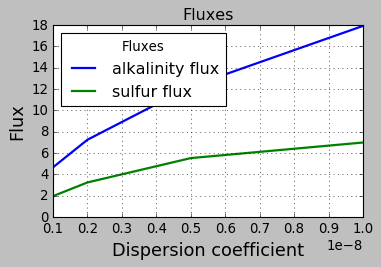

In [204]:
plt.style.use('classic')
fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(1, 1, 1) # row-col-num
ax.plot(x, alk_calc, linewidth=2, label=r'alkalinity flux')
ax.plot(x, total, linewidth=2, label=r'sulfur flux')
    
# --- add title and axis labels
ax.set_title('Fluxes')
ax.set_ylabel('Flux', fontsize=16)
ax.set_xlabel('Dispersion coefficient', fontsize=16)
# --- plot a legend in the best location
ax.legend(loc='upper left', title='Fluxes')
# --- add grid – not in default classic style
ax.grid(True)